In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


# **Exploratory Data Analysis**

In [ ]:
from collections import Counter
import pandas as pd
import numpy as np


# Loaded the Yelp businesses dataset
df_yelp = pd.read_json('/content/drive/My Drive/yelp_business.json', lines=True)

# Filtered the DataFrame to keep only rows where the state is FL, CA, or TX
states_to_keep = ['FL', 'CA', 'TX']
filtered_df = df_yelp[df_yelp['state'].isin(states_to_keep)]

all_categories = [
    item.strip()
    for sublist in filtered_df['categories'].dropna().str.split(',')
    for item in sublist
]


category_counts = Counter(all_categories)

# Get the top 30 most common categories
top_30_categories = category_counts.most_common(30)

# Our data is narrowed down to reviews for the Food and Beverages industry in Florida, California and Texas
# We are analysing Food and Beverages related categories from the top 30 categories

print(f"Number of rows after filtering for FL, CA, and TX: {filtered_df.shape[0]}")
print("\nTop 30 most common categories from the filtered data:")
for category, count in top_30_categories:
    print(f"{category}: {count}")

Number of rows after filtering for FL, CA, and TX: 31537

Top 30 most common categories from the filtered data:
Restaurants: 9892
Food: 5619
Shopping: 4960
Home Services: 3486
Beauty & Spas: 3192
Health & Medical: 2961
Nightlife: 2514
Local Services: 2490
Bars: 2320
Automotive: 2296
Event Planning & Services: 2090
Active Life: 2007
American (Traditional): 1643
Sandwiches: 1629
Hotels & Travel: 1387
Coffee & Tea: 1290
Breakfast & Brunch: 1265
American (New): 1213
Home & Garden: 1194
Pizza: 1184
Fast Food: 1159
Hair Salons: 1084
Auto Repair: 1070
Fashion: 1069
Arts & Entertainment: 1055
Doctors: 1044
Burgers: 1003
Nail Salons: 959
Seafood: 942
Mexican: 876


# **Data Preprocessing and Cleaning**

In [ ]:
# This filtered dataframe, taken from the Yelp Businesses dataset has F&B businesses from California, Texas and Florida
df_yelp = pd.read_json('/content/drive/My Drive/yelp_business.json', lines=True)


columns_to_drop = ['hours', 'address', 'postal_code', 'latitude', 'longitude','is_open']


df_yelp.drop(columns=columns_to_drop, inplace=True)

# Define your list for filtering
states_to_keep = ['FL', 'CA', 'TX']
categories_to_keep = 'Restaurants|Food|Bars|Sandwiches|Coffee & Tea|Breakfast & Brunch|Pizza|Fast Food|Burgers|Seafood'


filtered_df = df_yelp[
    (df_yelp['state'].isin(states_to_keep)) &
    (df_yelp['categories'].str.contains(categories_to_keep, case=False, na=False))
]

print("Filtered DataFrame:")
print(filtered_df.head())
print(f"\nTotal rows after filtering: {len(filtered_df)}")


Filtered DataFrame:
               business_id                   name       city state  stars  \
11  eEOYSgkmpB90uNA7lDOMRA  Vietnamese Food Truck  Tampa Bay    FL    4.0   
14  0bPLkL0QhhPO5kt1_EXmNQ   Zio's Italian Market      Largo    FL    4.5   
54  0qNpTGTcqPwOLi2hADx4Xw       Charlie's Market      Tampa    FL    3.0   
58  uI9XODGY_2_ieTE6xJ0myw            Roman Forum      Tampa    FL    4.0   
59  JgpnXv_0XhV3SfbfB50nxw            Joe's Pizza      Tampa    FL    4.0   

    review_count                                         attributes  \
11            10  {'Alcohol': ''none'', 'OutdoorSeating': 'None'...   
14           100  {'OutdoorSeating': 'False', 'RestaurantsGoodFo...   
54             9  {'BusinessParking': '{'garage': False, 'street...   
58            23  {'BusinessParking': '{'garage': False, 'street...   
59            35  {'BusinessParking': '{'garage': False, 'street...   

                                     categories  
11   Vietnamese, Food, Restaurants, Food

In [ ]:
# Here we merge the businesses and users dataset from Yelp
import pandas as pd
import duckdb

# Established a DuckDB connection
con = duckdb.connect(database=':memory:', read_only=False)

# Registered JSON files as virtual tables with 'union_by_name'
con.execute("CREATE OR REPLACE VIEW yelp_merged_data AS SELECT * FROM read_json_auto('/content/drive/My Drive/yelp_merged_data.json', union_by_name=True)")
con.execute("CREATE OR REPLACE VIEW yelp_user_data AS SELECT * FROM read_json_auto('/content/drive/My Drive/yelp_academic_dataset_user.json', union_by_name=True)")

# Used SQL to perform the join and select required columns
final_df = con.execute("""
    SELECT
        y.*,
        u.average_stars,
        u.review_count,
        u.name
    FROM
        yelp_merged_data AS y
    INNER JOIN
        yelp_user_data AS u
    ON
        y.user_id = u.user_id
""").fetchdf()

con.close()

print("Final DataFrame with user information:")
print(final_df.head())
print(f"\nTotal rows in the final DataFrame: {len(final_df)}")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Final DataFrame with user information:
              business_id                    name           city state  \
0  9ouyziwYpSvJzlLFpukSgA  Chipotle Mexican Grill  Pinellas Park    FL   
1  9ouyziwYpSvJzlLFpukSgA  Chipotle Mexican Grill  Pinellas Park    FL   
2  9ouyziwYpSvJzlLFpukSgA  Chipotle Mexican Grill  Pinellas Park    FL   
3  9ouyziwYpSvJzlLFpukSgA  Chipotle Mexican Grill  Pinellas Park    FL   
4  9ouyziwYpSvJzlLFpukSgA  Chipotle Mexican Grill  Pinellas Park    FL   

   stars_x  review_count                                         attributes  \
0      3.0            88  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   
1      3.0            88  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   
2      3.0            88  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   
3      3.0            88  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   
4      3.0            88  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   

                        categories       

In [ ]:
# Defined the new column names in a dictionary
new_column_names = {
    'name': 'business_name',
    'review_count': 'business_reviews_count',
    'name_1': 'reviewer_name',
    'user_id': 'reviewer_id',
    'stars_y': 'business_rating_given',
    'text': 'review',
    'average_stars': 'reviewer_average_rating',
    'review_count_1': 'reviewer_reviews_count',
}

# Renamed the columns
final_df = final_df.rename(columns=new_column_names)
final_df.drop(columns=['stars_x'], inplace=True)

In [ ]:
# Created a list with the desired column order
desired_order = [
    'business_id',
    'business_name',
    'city',
    'state',
    'business_reviews_count',
    'attributes',
    'categories',
    'reviewer_id',
    'reviewer_name',
    'reviewer_average_rating',
    'reviewer_reviews_count',
    'business_rating_given',
    'review'
]

# Reindex the DataFrame using the new column order
final_df = final_df[desired_order]


final_df.head()

,business_id,business_name,city,state,business_reviews_count,attributes,categories,reviewer_id,reviewer_name,reviewer_average_rating,reviewer_reviews_count,business_rating_given,review
0,9ouyziwYpSvJzlLFpukSgA,Chipotle Mexican Grill,Pinellas Park,FL,88,"{'OutdoorSeating': 'True', 'RestaurantsGoodFor...","Mexican, Fast Food, Restaurants",PTw3rESL0MwGOevG8JTs3g,Kaitlyn,3.65,143,5,This location is the best. The management is f...
1,9ouyziwYpSvJzlLFpukSgA,Chipotle Mexican Grill,Pinellas Park,FL,88,"{'OutdoorSeating': 'True', 'RestaurantsGoodFor...","Mexican, Fast Food, Restaurants",Djs4ZDkdaPdBYbe2KHG2KQ,Michael,3.67,6,1,"Completely inefficient, ran out of black beans..."
2,9ouyziwYpSvJzlLFpukSgA,Chipotle Mexican Grill,Pinellas Park,FL,88,"{'OutdoorSeating': 'True', 'RestaurantsGoodFor...","Mexican, Fast Food, Restaurants",wiIrT3H8hVxH1QdJD6jbqQ,World,3.67,87,5,Love their rice. I tried at home but didn't co...
3,9ouyziwYpSvJzlLFpukSgA,Chipotle Mexican Grill,Pinellas Park,FL,88,"{'OutdoorSeating': 'True', 'RestaurantsGoodFor...","Mexican, Fast Food, Restaurants",t9rCx0ni7oabGhx2Bw-kZw,Michaelle,4.36,109,5,They always serve with a smile and even on the...
4,9ouyziwYpSvJzlLFpukSgA,Chipotle Mexican Grill,Pinellas Park,FL,88,"{'OutdoorSeating': 'True', 'RestaurantsGoodFor...","Mexican, Fast Food, Restaurants",Vc0YQi0S3LDgYaFTPZ_QoQ,Ed,3.87,100,4,The food is always great. I've never had a bad...


In [ ]:
final_df.isnull().sum()
final_df.info()
cleaned_df = final_df.dropna()
print(f"\nTotal rows in the cleaned DataFrame: {len(cleaned_df)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110843 entries, 0 to 1110842
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   business_id              1110843 non-null  object 
 1   business_name            1110843 non-null  object 
 2   city                     1110843 non-null  object 
 3   state                    1110843 non-null  object 
 4   business_reviews_count   1110843 non-null  int64  
 5   attributes               1109292 non-null  object 
 6   categories               1110843 non-null  object 
 7   reviewer_id              1110843 non-null  object 
 8   reviewer_name            1110843 non-null  object 
 9   reviewer_average_rating  1110843 non-null  float64
 10  reviewer_reviews_count   1110843 non-null  int64  
 11  business_rating_given    1110843 non-null  int64  
 12  review                   1110843 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory 

# **Feature Engineering**

We created a new feature called repeated_review_count that shows a count of reviews that a user has given for the same business. If the reviewer has only reviewed the business once, it will be NaN.

In [ ]:
# Group by business_id and reviewer_id, then count the number of reviews
review_counts = cleaned_df.groupby(['business_id', 'reviewer_id']).size().reset_index(name='review_count')

# Filter to find only those who reviewed the same place more than once
repeated_reviews = review_counts[review_counts['review_count'] > 1]

print("\nReviewers who reviewed the same place more than once:")
print(repeated_reviews.head())


Reviewers who reviewed the same place more than once:
                business_id             reviewer_id  review_count
118  -0EdehHjIQc0DtYU8QcAig  tJRsHAQUiewvv420lYnJeg             2
138  -0i2KNr7WrCsDF5m0IViJg  K81DSGPsflFdbyXFAytisQ             2
181  -1oygVebK81K8JEPI6H6Lw  -OeDOCY60_erQ_NXI7I4lQ             2
197  -1oygVebK81K8JEPI6H6Lw  Bofiz9C2LxbGfqtQIMc5vA             2
206  -1oygVebK81K8JEPI6H6Lw  JReJc_dnlN-9L_fzpn0Nmw             2


In [ ]:
import numpy as np
# Create the count DataFrame
review_counts = cleaned_df.groupby(['business_id', 'reviewer_id']).size().reset_index(name='review_count')

# Left merge the counts back into the original DataFrame
final_cleaned_df = pd.merge(cleaned_df, review_counts, on=['business_id', 'reviewer_id'], how='left')

# Filter and clean the new column
final_cleaned_df = final_cleaned_df.rename(columns={'review_count': 'repeated_review_count'})

# Set the count to NaN where the count is 1
final_cleaned_df.loc[final_cleaned_df['repeated_review_count'] == 1, 'repeated_review_count'] = np.nan
final_cleaned_df = final_cleaned_df.drop(columns=['business_id'])

print("\nDataFrame with 'repeated_review_count' column:")
print(final_cleaned_df.head())


DataFrame with 'repeated_review_count' column:
            business_name           city state  business_reviews_count  \
0  Chipotle Mexican Grill  Pinellas Park    FL                      88   
1  Chipotle Mexican Grill  Pinellas Park    FL                      88   
2  Chipotle Mexican Grill  Pinellas Park    FL                      88   
3  Chipotle Mexican Grill  Pinellas Park    FL                      88   
4  Chipotle Mexican Grill  Pinellas Park    FL                      88   

                                          attributes  \
0  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   
1  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   
2  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   
3  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   
4  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   

                        categories             reviewer_id reviewer_name  \
0  Mexican, Fast Food, Restaurants  PTw3rESL0MwGOevG8JTs3g       Kaitlyn   
1  Mexican, Fast F

In [ ]:
df_cali = pd.read_csv('/content/drive/My Drive/cali_10_scraped_data.csv')
df_texas = pd.read_csv('/content/drive/My Drive/texas_10_scraped_data.csv')
df_cali['state'] = 'CA'
df_texas['state'] = 'TX'
# Combine the two DataFrames into a single DataFrame
cali_texas_df = pd.concat([df_cali, df_texas], ignore_index=True)

# Remove the 'reviewUrl' column
cali_texas_df = cali_texas_df.drop(columns=['reviewUrl'])
cali_texas_df = cali_texas_df.drop(columns=['url'])

# Remove any rows that have missing (null) values in any column
cali_texas_cleaned_df = cali_texas_df.dropna()


new_column_names = {
    'title': 'business_name',
    'name': 'reviewer_name',
    'stars': 'business_rating_given',
    'text': 'review',
}

# Rename the columns
cali_texas_cleaned_df = cali_texas_cleaned_df.rename(columns=new_column_names)
print(cali_texas_cleaned_df.head())



  business_name  business_rating_given     reviewer_name  \
0        Holbox                      5     Jeff Niemeyer   
1        Holbox                      5        Natasha Lo   
2        Holbox                      5   Richard Jimenez   
3        Holbox                      5           Danny Y   
4        Holbox                      5  Isai Eli Ramirez   

                                              review state  
0  Arguably one of the best restaurants I’ve ever...    CA  
1  If you're looking for an unforgettable dining ...    CA  
2  It's definitely priced higher than regular sea...    CA  
3  First time visiting.  This place was really di...    CA  
4  Holbox is a seafood paradise where every dish ...    CA  


In [ ]:
unioned_df = pd.concat([final_cleaned_df, cali_texas_cleaned_df], ignore_index=True)

# Print the result to see the combined data with the new column
print(unioned_df.head())

            business_name           city state  business_reviews_count  \
0  Chipotle Mexican Grill  Pinellas Park    FL                    88.0   
1  Chipotle Mexican Grill  Pinellas Park    FL                    88.0   
2  Chipotle Mexican Grill  Pinellas Park    FL                    88.0   
3  Chipotle Mexican Grill  Pinellas Park    FL                    88.0   
4  Chipotle Mexican Grill  Pinellas Park    FL                    88.0   

                                          attributes  \
0  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   
1  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   
2  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   
3  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   
4  {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   

                        categories             reviewer_id reviewer_name  \
0  Mexican, Fast Food, Restaurants  PTw3rESL0MwGOevG8JTs3g       Kaitlyn   
1  Mexican, Fast Food, Restaurants  Djs4ZDkdaPdBYbe2KHG2KQ       M

In [ ]:
unioned_df.to_csv('unioned_df.csv', index=False)
from google.colab import files
files.download('unioned_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Policy enforcement Module**

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch

In [ ]:
# Helper function to get binary label
def get_binary_label(category: str) -> int:
    return 1 if category == "Valid Review" else 0

# Load Sentence Transformer model for relevancy scoring
model_emb = SentenceTransformer('all-MiniLM-L6-v2')

# Function to calculate relevancy score
def get_relevancy_score(review, categories, attributes):
    target_text = f"{categories} {attributes}"
    emb_review = model_emb.encode(review, convert_to_tensor=True)
    emb_target = model_emb.encode(target_text, convert_to_tensor=True)
    score = util.cos_sim(emb_review, emb_target).item()
    # scale to 0-10
    return round(score * 10, 2)

# Function to check for spam based on the existing 'repeated_reviews_count' column
def check_spam_rule(df):
    df.loc[df['repeated_review_count'] > 5, 'Category'] = 'Spam'
    df.loc[df['repeated_review_count'] > 5, 'Binary'] = 0
    return df


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# **Model Development**

In [ ]:
!pip install llama-cpp-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 MB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.3 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.16-cp312-cp312-linux_x86_64.whl size=4422319 sha256=e2e1f1c209001892348cf5bda3746afe3186dcd31b3f4c3b3bd862ae0b59e862
  Stored in directory: /root/.cache/pip/wheels/90/82/ab/8784ee3fb99ddb07fd36a679ddbe63122cc07718f6c1eb3be8
Successfully built llama-cpp-python


In [ ]:
import os
from llama_cpp import Llama
from huggingface_hub import hf_hub_download


repo_id = "Qwen/Qwen1.5-7B-Chat-GGUF"
filename = "qwen1_5-7b-chat-q4_k_m.gguf" # This is a common quantized GGUF file.


try:
    model_path = hf_hub_download(repo_id=repo_id, filename=filename)
    print(f"Model downloaded successfully to: {model_path}")

    # Used the correct path to load the model with llama-cpp-python
    llm = Llama(model_path=model_path, n_gpu_layers=-1)
    print("Model loaded successfully!")

except Exception as e:
    print(f"An error occurred during download or loading: {e}")

qwen1_5-7b-chat-q4_k_m.gguf:   0%|          | 0.00/4.77G [00:00<?, ?B/s]

llama_model_loader: loaded meta data with 21 key-value pairs and 387 tensors from /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-7B-Chat-GGUF/snapshots/79b781af68a192ee2ec43cded6c3b5448a70df66/qwen1_5-7b-chat-q4_k_m.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = qwen2
llama_model_loader: - kv   1:                               general.name str              = Qwen1.5-7B-Chat-AWQ-fp16
llama_model_loader: - kv   2:                          qwen2.block_count u32              = 32
llama_model_loader: - kv   3:                       qwen2.context_length u32              = 32768
llama_model_loader: - kv   4:                     qwen2.embedding_length u32              = 4096
llama_model_loader: - kv   5:                  qwen2.feed_forward_length u32              = 11008
llama_model_loader: - kv   6:                 q

Model downloaded successfully to: /root/.cache/huggingface/hub/models--Qwen--Qwen1.5-7B-Chat-GGUF/snapshots/79b781af68a192ee2ec43cded6c3b5448a70df66/qwen1_5-7b-chat-q4_k_m.gguf


llama_model_loader: - kv  14:                      tokenizer.ggml.merges arr[str,151387]  = ["Ġ Ġ", "ĠĠ ĠĠ", "i n", "Ġ t",...
llama_model_loader: - kv  15:                tokenizer.ggml.eos_token_id u32              = 151645
llama_model_loader: - kv  16:            tokenizer.ggml.padding_token_id u32              = 151643
llama_model_loader: - kv  17:                tokenizer.ggml.bos_token_id u32              = 151643
llama_model_loader: - kv  18:                    tokenizer.chat_template str              = {% for message in messages %}{{'<|im_...
llama_model_loader: - kv  19:               general.quantization_version u32              = 2
llama_model_loader: - kv  20:                          general.file_type u32              = 15
llama_model_loader: - type  f32:  161 tensors
llama_model_loader: - type q4_K:  193 tensors
llama_model_loader: - type q6_K:   33 tensors
print_info: file format = GGUF V3 (latest)
print_info: file type   = Q4_K - Medium
print_info: file size   = 4.43 GiB

Model loaded successfully!


CPU : SSE3 = 1 | SSSE3 = 1 | AVX = 1 | AVX2 = 1 | F16C = 1 | FMA = 1 | BMI2 = 1 | LLAMAFILE = 1 | OPENMP = 1 | REPACK = 1 | 
Model metadata: {'general.file_type': '15', 'tokenizer.ggml.bos_token_id': '151643', 'general.architecture': 'qwen2', 'general.name': 'Qwen1.5-7B-Chat-AWQ-fp16', 'qwen2.block_count': '32', 'qwen2.context_length': '32768', 'tokenizer.chat_template': "{% for message in messages %}{{'<|im_start|>' + message['role'] + '\n' + message['content'] + '<|im_end|>' + '\n'}}{% endfor %}{% if add_generation_prompt %}{{ '<|im_start|>assistant\n' }}{% endif %}", 'qwen2.attention.head_count_kv': '32', 'tokenizer.ggml.padding_token_id': '151643', 'qwen2.embedding_length': '4096', 'qwen2.attention.layer_norm_rms_epsilon': '0.000001', 'qwen2.attention.head_count': '32', 'tokenizer.ggml.eos_token_id': '151645', 'qwen2.rope.freq_base': '1000000.000000', 'qwen2.use_parallel_residual': 'true', 'general.quantization_version': '2', 'qwen2.feed_forward_length': '11008', 'tokenizer.ggml.mo

In [ ]:
def create_chat_prompt(review):
    return [
        {"role": "system", "content": "You are a review moderation assistant. Your task is to classify Google location reviews into exactly ONE of the following categories: Advertisement, Spam, Not Related to F&B, or Valid Review. Do NOT explain your reasoning. If uncertain, choose the closest matching category. IMPORTANT: If the review's main topic is NOT about food, beverages, service, or atmosphere, classify it as 'Not Related to F&B', even if it mentions a restaurant or cafe."},
        {"role": "user", "content": "Review: \"The pizza was delicious and the staff were friendly.\"\nOutput: Valid Review"},
        {"role": "user", "content": "Review: \"Great place for a quick lunch. The menu had plenty of options.\"\nOutput: Valid Review"},
        {"role": "user", "content": "Review: \"The service was a bit slow, but the coffee made up for it.\"\nOutput: Valid Review"},
        {"role": "user", "content": "Review: \"None of us could stomach than a few bites. The beef tasted spoiled; the chicken tasteless (although smelled of teriyaki sauce). The cheese dip was not good. I do not understand the draw of this place.\"\nOutput: Valid Review"},
        {"role": "user", "content": "Review: \"50% OFF, visit my blog for more deals!\"\nOutput: Advertisement"},
        {"role": "user", "content": "Review: \"This app is terrible, don’t use it.\"\nOutput: Spam"},
        {"role": "user", "content": "Review: \"The movie theater had a great selection of snacks, but the main feature was terrible.\"\nOutput: Not Related to F&B"},
        {"role": "user", "content": "Review: \"I went rock climbing and it was so fun. It was near this restaurant.\"\nOutput: Not Related to F&B"},
        {"role": "user", "content": "Review: \"The dentist here is very caring and professional.\"\nOutput: Not Related to F&B"},
        {"role": "user", "content": f"Review: \"{review}\"\nOutput:"}
    ]


def classify_review(review):
    messages = create_chat_prompt(review)
    output = llm.create_chat_completion(
        messages,
        max_tokens=10,
        temperature=0.0,
        stop=["\n"]
    )
    generated_text = output['choices'][0]['message']['content'].strip()
    return generated_text

In [ ]:
# Main function to process the entire dataframe
def process_reviews(df):
    # Apply spam rule first.
    df = check_spam_rule(df)

    # Use a mask to only classify reviews that are not already categorised as 'Spam'
    mask = df['Category'] != 'Spam'
    df.loc[mask, 'Category'] = df.loc[mask, 'review'].apply(classify_review)

    # Get binary labels based on the final category
    df['Binary'] = df['Category'].apply(get_binary_label)

    # Calculate relevancy score ONLY for 'Valid Review' entries.
    df['Relevancy'] = df.apply(
        lambda row: get_relevancy_score(row['review'], row['categories'], row['attributes'])
        if row['Category'] == "Valid Review" else None, axis=1
    )

    return df

In [ ]:
# Create a random sample of 1 row that will pick a new, random row each time the code is run
pd.set_option('display.max_colwidth', None)
sample_df = unioned_df.sample(n=1)

#Pass the smaller sample DataFrame into processing function
processed_sample = process_reviews(sample_df)
print(processed_sample.head())



Llama.generate: 393 prefix-match hit, remaining 30 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   16936.63 ms /    30 tokens (  564.55 ms per token,     1.77 tokens per second)
llama_perf_context_print:        eval time =   14675.47 ms /     2 runs   ( 7337.74 ms per token,     0.14 tokens per second)
llama_perf_context_print:       total time =   31626.22 ms /    32 tokens
llama_perf_context_print:    graphs reused =          1


       business_name     city state  business_reviews_count  \
609897   Mission BBQ  Brandon    FL                   183.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

# **Testing**

In [ ]:
# This code chuck tests an example of a review from the 'Not Related to F&B' Category
test_data = {
    'review': [
        "I want to go rock climbing today, the place is near this restaurant"
    ],
    'repeated_review_count': [1], # This is not spam
    'categories': ['Restaurants'],
    'attributes': ['Takeout']
}
test_df = pd.DataFrame(test_data)
processed_test_df = process_reviews(test_df)

# Check the results
print(processed_test_df[['review', 'Category', 'Binary', 'Relevancy']])

Llama.generate: 393 prefix-match hit, remaining 23 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   13965.22 ms /    23 tokens (  607.18 ms per token,     1.65 tokens per second)
llama_perf_context_print:        eval time =   42803.35 ms /     6 runs   ( 7133.89 ms per token,     0.14 tokens per second)
llama_perf_context_print:       total time =   56799.83 ms /    29 tokens
llama_perf_context_print:    graphs reused =          5


                                                                review  \
0  I want to go rock climbing today, the place is near this restaurant   

             Category  Binary Relevancy  
0  Not Related to F&B       0      None  


In [ ]:
# This code chuck tests an example of a review from the 'Advertisement' Category
test_data = {
    'review': [
        "This is an absolute game-changer! I can't believe I ever lived without the XYZ app."
        "It's so user-friendly and the features are incredible. Use my referral code 'XYZ2025' to get 10% off your first purchase!"
        "Don't wait—this offer won't last forever. #XYZapp #bestappever"
    ],
    'repeated_review_count': [1], # This is not spam
    'categories': ['Restaurants'],
    'attributes': ['Takeout']
}
test_df = pd.DataFrame(test_data)

# Run full processing pipeline on the test DataFrame
processed_test_df = process_reviews(test_df)

# Check the results
print(processed_test_df[['review', 'Category', 'Binary', 'Relevancy']])

Llama.generate: 414 prefix-match hit, remaining 67 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   27302.04 ms /    67 tokens (  407.49 ms per token,     2.45 tokens per second)
llama_perf_context_print:        eval time =    7613.28 ms /     1 runs   ( 7613.28 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   34925.18 ms /    68 tokens
llama_perf_context_print:    graphs reused =          0


                                                                                                                                                                                                                                                                       review  \
0  This is an absolute game-changer! I can't believe I ever lived without the XYZ app.It's so user-friendly and the features are incredible. Use my referral code 'XYZ2025' to get 10% off your first purchase!Don't wait—this offer won't last forever. #XYZapp #bestappever   

        Category  Binary Relevancy  
0  Advertisement       0      None  


In [ ]:
# This code chuck tests an example of a review from the 'Spam' Category
pd.set_option('display.max_colwidth', None)
filtered_df = unioned_df[unioned_df['repeated_review_count'] > 5]
sample_df = filtered_df.sample(n=2)
processed_sample = process_reviews(sample_df)
print(processed_sample.head(10))

                       business_name           city state  \
527337     Rudy's Mexican Restaurant  Santa Barbara    CA   
959350  Uncle Roccos Famous NY Pizza  Santa Barbara    CA   

        business_reviews_count  \
527337                   130.0   
959350                   317.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

# **Evaluation and Reporting**

In [ ]:
import pandas as pd
from llama_cpp import Llama


REVIEW_COLUMN = 'review'
GROUND_TRUTH_COLUMN = 'ground_truth'
OUTPUT_CATEGORY_COLUMN = 'Category'
COUNT_COLUMN = 'repeated_review_count'

# loading our random sampled 100-row CSV file for evaluation
df = pd.read_csv('/content/drive/My Drive/sample_for_labeling.csv')


if REVIEW_COLUMN not in df.columns or GROUND_TRUTH_COLUMN not in df.columns:
    print(f"Error: Your CSV file is missing one of the required columns: '{REVIEW_COLUMN}' or '{GROUND_TRUTH_COLUMN}'.")
    print("Available columns:", df.columns.tolist())
else:

    categories_list = []


    MAX_TOKENS = 500

    # Loop through each row of the DataFrame
    for index, row in df.iterrows():
        # Handle potential nulls in repeated_review_count
        if pd.isna(row[COUNT_COLUMN]):
            row[COUNT_COLUMN] = 0 # Or whatever default value is appropriate

        # Check if the review text is valid
        review_text = row[REVIEW_COLUMN]
        if not isinstance(review_text, str):
            print(f"Skipping row {index} due to non-string review text.")
            categories_list.append(None)
            continue

        # Truncate the review text if it's too long
        review_words = review_text.split()
        if len(review_words) > MAX_TOKENS:
            truncated_text = " ".join(review_words[:MAX_TOKENS])
            row[REVIEW_COLUMN] = truncated_text

        # Pass the entire row (as a DataFrame) to the processing function
        single_row_df = pd.DataFrame([row])

        try:
            # Process the single row
            processed_row = process_reviews(single_row_df)

            # Standardize the column name returned by the function
            if OUTPUT_CATEGORY_COLUMN in processed_row.columns:
                category = processed_row[OUTPUT_CATEGORY_COLUMN].iloc[0]
            elif OUTPUT_CATEGORY_COLUMN.lower() in processed_row.columns:
                category = processed_row[OUTPUT_CATEGORY_COLUMN.lower()].iloc[0]
            else:
                raise KeyError(f"The 'process_reviews' function did not return a '{OUTPUT_CATEGORY_COLUMN}' or '{OUTPUT_CATEGORY_COLUMN.lower()}' column.")

            categories_list.append(category)
            print(f"Row {index} processed.")

        except (KeyError, ValueError) as e:
            print(f"Error processing row {index}: {e}")
            categories_list.append(None)

    df[OUTPUT_CATEGORY_COLUMN] = categories_list
    output_df = df[[OUTPUT_CATEGORY_COLUMN, GROUND_TRUTH_COLUMN]]
    output_df.to_csv('labeled_reviews.csv', index=False)

    print("\nProcessing complete. Output saved to 'labeled_reviews.csv'")

Llama.generate: 398 prefix-match hit, remaining 100 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   35377.48 ms /   100 tokens (  353.77 ms per token,     2.83 tokens per second)
llama_perf_context_print:        eval time =   15119.22 ms /     2 runs   ( 7559.61 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   50511.99 ms /   102 tokens
llama_perf_context_print:    graphs reused =          1


Row 0 processed.
Error processing row 1: Requested tokens (546) exceed context window of 512
Error processing row 2: Requested tokens (585) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 46 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   20859.38 ms /    46 tokens (  453.46 ms per token,     2.21 tokens per second)
llama_perf_context_print:        eval time =   14801.43 ms /     2 runs   ( 7400.71 ms per token,     0.14 tokens per second)
llama_perf_context_print:       total time =   35676.30 ms /    48 tokens
llama_perf_context_print:    graphs reused =          1


Row 3 processed.


Llama.generate: 393 prefix-match hit, remaining 50 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   22803.90 ms /    50 tokens (  456.08 ms per token,     2.19 tokens per second)
llama_perf_context_print:        eval time =   15190.98 ms /     2 runs   ( 7595.49 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   38010.37 ms /    52 tokens
llama_perf_context_print:    graphs reused =          1


Row 4 processed.


Llama.generate: 393 prefix-match hit, remaining 111 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   40116.66 ms /   111 tokens (  361.41 ms per token,     2.77 tokens per second)
llama_perf_context_print:        eval time =   15266.41 ms /     2 runs   ( 7633.21 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   55399.50 ms /   113 tokens
llama_perf_context_print:    graphs reused =          1


Row 5 processed.


Llama.generate: 393 prefix-match hit, remaining 61 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   25705.83 ms /    61 tokens (  421.41 ms per token,     2.37 tokens per second)
llama_perf_context_print:        eval time =   15061.94 ms /     2 runs   ( 7530.97 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   40783.48 ms /    63 tokens
llama_perf_context_print:    graphs reused =          1


Row 6 processed.


Llama.generate: 393 prefix-match hit, remaining 110 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   39875.77 ms /   110 tokens (  362.51 ms per token,     2.76 tokens per second)
llama_perf_context_print:        eval time =   15624.59 ms /     2 runs   ( 7812.30 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   55516.13 ms /   112 tokens
llama_perf_context_print:    graphs reused =          1


Row 7 processed.
Error processing row 8: Requested tokens (528) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 77 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   29809.40 ms /    77 tokens (  387.14 ms per token,     2.58 tokens per second)
llama_perf_context_print:        eval time =   15556.47 ms /     2 runs   ( 7778.23 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   45381.62 ms /    79 tokens
llama_perf_context_print:    graphs reused =          1


Row 9 processed.


Llama.generate: 393 prefix-match hit, remaining 67 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   27586.66 ms /    67 tokens (  411.74 ms per token,     2.43 tokens per second)
llama_perf_context_print:        eval time =   15200.27 ms /     2 runs   ( 7600.14 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   42803.26 ms /    69 tokens
llama_perf_context_print:    graphs reused =          1


Row 10 processed.


Llama.generate: 393 prefix-match hit, remaining 38 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   18469.29 ms /    38 tokens (  486.03 ms per token,     2.06 tokens per second)
llama_perf_context_print:        eval time =   14867.50 ms /     2 runs   ( 7433.75 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   33354.33 ms /    40 tokens
llama_perf_context_print:    graphs reused =          1


Row 11 processed.


Llama.generate: 393 prefix-match hit, remaining 82 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   30655.21 ms /    82 tokens (  373.84 ms per token,     2.67 tokens per second)
llama_perf_context_print:        eval time =   15141.02 ms /     2 runs   ( 7570.51 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   45811.84 ms /    84 tokens
llama_perf_context_print:    graphs reused =          1


Row 12 processed.


Llama.generate: 393 prefix-match hit, remaining 68 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   27368.30 ms /    68 tokens (  402.47 ms per token,     2.48 tokens per second)
llama_perf_context_print:        eval time =   15263.68 ms /     2 runs   ( 7631.84 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   42646.94 ms /    70 tokens
llama_perf_context_print:    graphs reused =          1


Row 13 processed.


Llama.generate: 393 prefix-match hit, remaining 64 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   24095.76 ms /    64 tokens (  376.50 ms per token,     2.66 tokens per second)
llama_perf_context_print:        eval time =   15073.76 ms /     2 runs   ( 7536.88 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   39185.20 ms /    66 tokens
llama_perf_context_print:    graphs reused =          1


Row 14 processed.


Llama.generate: 393 prefix-match hit, remaining 41 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   19122.51 ms /    41 tokens (  466.40 ms per token,     2.14 tokens per second)
llama_perf_context_print:        eval time =   15046.75 ms /     2 runs   ( 7523.38 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   34185.51 ms /    43 tokens
llama_perf_context_print:    graphs reused =          1


Row 15 processed.
Error processing row 16: Requested tokens (600) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 78 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   30487.99 ms /    78 tokens (  390.87 ms per token,     2.56 tokens per second)
llama_perf_context_print:        eval time =   14940.17 ms /     2 runs   ( 7470.08 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   45442.84 ms /    80 tokens
llama_perf_context_print:    graphs reused =          1


Row 17 processed.


Llama.generate: 393 prefix-match hit, remaining 61 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   24192.50 ms /    61 tokens (  396.60 ms per token,     2.52 tokens per second)
llama_perf_context_print:        eval time =   14841.74 ms /     2 runs   ( 7420.87 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   39049.18 ms /    63 tokens
llama_perf_context_print:    graphs reused =          1


Row 18 processed.


Llama.generate: 393 prefix-match hit, remaining 61 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   24290.39 ms /    61 tokens (  398.20 ms per token,     2.51 tokens per second)
llama_perf_context_print:        eval time =   14762.21 ms /     2 runs   ( 7381.11 ms per token,     0.14 tokens per second)
llama_perf_context_print:       total time =   39066.92 ms /    63 tokens
llama_perf_context_print:    graphs reused =          1


Row 19 processed.


Llama.generate: 393 prefix-match hit, remaining 39 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   18744.19 ms /    39 tokens (  480.62 ms per token,     2.08 tokens per second)
llama_perf_context_print:        eval time =   15146.56 ms /     2 runs   ( 7573.28 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   33905.65 ms /    41 tokens
llama_perf_context_print:    graphs reused =          1


Row 20 processed.
Error processing row 21: Requested tokens (546) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 107 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   37995.77 ms /   107 tokens (  355.10 ms per token,     2.82 tokens per second)
llama_perf_context_print:        eval time =   15088.10 ms /     2 runs   ( 7544.05 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   53100.27 ms /   109 tokens
llama_perf_context_print:    graphs reused =          1


Row 22 processed.


Llama.generate: 393 prefix-match hit, remaining 103 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   37411.08 ms /   103 tokens (  363.21 ms per token,     2.75 tokens per second)
llama_perf_context_print:        eval time =   16753.03 ms /     2 runs   ( 8376.52 ms per token,     0.12 tokens per second)
llama_perf_context_print:       total time =   54180.83 ms /   105 tokens
llama_perf_context_print:    graphs reused =          1


Row 23 processed.
Error processing row 24: Requested tokens (531) exceed context window of 512
Error processing row 25: Requested tokens (551) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 36 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   18033.96 ms /    36 tokens (  500.94 ms per token,     2.00 tokens per second)
llama_perf_context_print:        eval time =   15519.70 ms /     2 runs   ( 7759.85 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   33569.94 ms /    38 tokens
llama_perf_context_print:    graphs reused =          1


Row 26 processed.


Llama.generate: 393 prefix-match hit, remaining 72 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   28436.11 ms /    72 tokens (  394.95 ms per token,     2.53 tokens per second)
llama_perf_context_print:        eval time =   15248.04 ms /     2 runs   ( 7624.02 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   43699.54 ms /    74 tokens
llama_perf_context_print:    graphs reused =          1


Row 27 processed.
Error processing row 28: Requested tokens (566) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 55 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   23219.05 ms /    55 tokens (  422.16 ms per token,     2.37 tokens per second)
llama_perf_context_print:        eval time =   15194.55 ms /     2 runs   ( 7597.27 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   38428.43 ms /    57 tokens
llama_perf_context_print:    graphs reused =          1


Row 29 processed.


Llama.generate: 393 prefix-match hit, remaining 42 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   20487.36 ms /    42 tokens (  487.79 ms per token,     2.05 tokens per second)
llama_perf_context_print:        eval time =   15190.66 ms /     2 runs   ( 7595.33 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   35693.73 ms /    44 tokens
llama_perf_context_print:    graphs reused =          1


Row 30 processed.


Llama.generate: 394 prefix-match hit, remaining 68 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   27550.70 ms /    68 tokens (  405.16 ms per token,     2.47 tokens per second)
llama_perf_context_print:        eval time =   15039.03 ms /     2 runs   ( 7519.52 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   42604.69 ms /    70 tokens
llama_perf_context_print:    graphs reused =          1


Row 31 processed.


Llama.generate: 393 prefix-match hit, remaining 33 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   16987.57 ms /    33 tokens (  514.77 ms per token,     1.94 tokens per second)
llama_perf_context_print:        eval time =   15499.82 ms /     2 runs   ( 7749.91 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   32502.57 ms /    35 tokens
llama_perf_context_print:    graphs reused =          1


Row 32 processed.


Llama.generate: 393 prefix-match hit, remaining 35 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   17521.31 ms /    35 tokens (  500.61 ms per token,     2.00 tokens per second)
llama_perf_context_print:        eval time =   15388.70 ms /     2 runs   ( 7694.35 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   32925.47 ms /    37 tokens
llama_perf_context_print:    graphs reused =          1


Row 33 processed.


Llama.generate: 394 prefix-match hit, remaining 33 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   16639.43 ms /    33 tokens (  504.23 ms per token,     1.98 tokens per second)
llama_perf_context_print:        eval time =   15071.36 ms /     2 runs   ( 7535.68 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   31726.96 ms /    35 tokens
llama_perf_context_print:    graphs reused =          1


Row 34 processed.


Llama.generate: 393 prefix-match hit, remaining 89 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   33169.69 ms /    89 tokens (  372.69 ms per token,     2.68 tokens per second)
llama_perf_context_print:        eval time =   16004.47 ms /     2 runs   ( 8002.24 ms per token,     0.12 tokens per second)
llama_perf_context_print:       total time =   49190.82 ms /    91 tokens
llama_perf_context_print:    graphs reused =          1


Row 35 processed.


Llama.generate: 393 prefix-match hit, remaining 60 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   24174.86 ms /    60 tokens (  402.91 ms per token,     2.48 tokens per second)
llama_perf_context_print:        eval time =   15193.32 ms /     2 runs   ( 7596.66 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   39384.29 ms /    62 tokens
llama_perf_context_print:    graphs reused =          1


Row 36 processed.


Llama.generate: 393 prefix-match hit, remaining 108 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   38368.26 ms /   108 tokens (  355.26 ms per token,     2.81 tokens per second)
llama_perf_context_print:        eval time =   15740.51 ms /     2 runs   ( 7870.25 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   54124.86 ms /   110 tokens
llama_perf_context_print:    graphs reused =          1


Row 37 processed.
Error processing row 38: Requested tokens (654) exceed context window of 512
Error processing row 39: Requested tokens (541) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 109 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   39255.57 ms /   109 tokens (  360.14 ms per token,     2.78 tokens per second)
llama_perf_context_print:        eval time =   15653.50 ms /     2 runs   ( 7826.75 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   54925.16 ms /   111 tokens
llama_perf_context_print:    graphs reused =          1


Row 40 processed.


Llama.generate: 393 prefix-match hit, remaining 89 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   33062.40 ms /    89 tokens (  371.49 ms per token,     2.69 tokens per second)
llama_perf_context_print:        eval time =   15498.31 ms /     2 runs   ( 7749.15 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   48576.30 ms /    91 tokens
llama_perf_context_print:    graphs reused =          1


Row 41 processed.


Llama.generate: 393 prefix-match hit, remaining 43 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   20296.74 ms /    43 tokens (  472.02 ms per token,     2.12 tokens per second)
llama_perf_context_print:        eval time =   44803.01 ms /     6 runs   ( 7467.17 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   65134.36 ms /    49 tokens
llama_perf_context_print:    graphs reused =          5
Llama.generate: 393 prefix-match hit, remaining 41 prompt tokens to eval


Row 42 processed.


llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   19630.60 ms /    41 tokens (  478.80 ms per token,     2.09 tokens per second)
llama_perf_context_print:        eval time =   15232.44 ms /     2 runs   ( 7616.22 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   34880.08 ms /    43 tokens
llama_perf_context_print:    graphs reused =          1


Row 43 processed.


Llama.generate: 393 prefix-match hit, remaining 55 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   24141.15 ms /    55 tokens (  438.93 ms per token,     2.28 tokens per second)
llama_perf_context_print:        eval time =   15858.52 ms /     2 runs   ( 7929.26 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   40015.64 ms /    57 tokens
llama_perf_context_print:    graphs reused =          1


Row 44 processed.


Llama.generate: 393 prefix-match hit, remaining 64 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   24854.00 ms /    64 tokens (  388.34 ms per token,     2.58 tokens per second)
llama_perf_context_print:        eval time =   15381.31 ms /     2 runs   ( 7690.65 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   40253.80 ms /    66 tokens
llama_perf_context_print:    graphs reused =          1


Row 45 processed.
Error processing row 46: Requested tokens (520) exceed context window of 512
Error processing row 47: Requested tokens (538) exceed context window of 512
Error processing row 48: Requested tokens (525) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 63 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   25138.62 ms /    63 tokens (  399.03 ms per token,     2.51 tokens per second)
llama_perf_context_print:        eval time =   15112.09 ms /     2 runs   ( 7556.05 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   40266.22 ms /    65 tokens
llama_perf_context_print:    graphs reused =          1


Row 49 processed.
Error processing row 50: Requested tokens (586) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 96 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   33663.38 ms /    96 tokens (  350.66 ms per token,     2.85 tokens per second)
llama_perf_context_print:        eval time =   15072.27 ms /     2 runs   ( 7536.14 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   48750.47 ms /    98 tokens
llama_perf_context_print:    graphs reused =          1


Row 51 processed.
Error processing row 52: Requested tokens (632) exceed context window of 512
Error processing row 53: Requested tokens (573) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 32 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   15629.98 ms /    32 tokens (  488.44 ms per token,     2.05 tokens per second)
llama_perf_context_print:        eval time =   15163.65 ms /     2 runs   ( 7581.83 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   30809.95 ms /    34 tokens
llama_perf_context_print:    graphs reused =          1


Row 54 processed.
Error processing row 55: Requested tokens (556) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 52 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   21569.17 ms /    52 tokens (  414.79 ms per token,     2.41 tokens per second)
llama_perf_context_print:        eval time =   15181.99 ms /     2 runs   ( 7591.00 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   36765.95 ms /    54 tokens
llama_perf_context_print:    graphs reused =          1


Row 56 processed.


Llama.generate: 393 prefix-match hit, remaining 44 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   20270.42 ms /    44 tokens (  460.69 ms per token,     2.17 tokens per second)
llama_perf_context_print:        eval time =   16452.16 ms /     2 runs   ( 8226.08 ms per token,     0.12 tokens per second)
llama_perf_context_print:       total time =   36739.57 ms /    46 tokens
llama_perf_context_print:    graphs reused =          1


Row 57 processed.


Llama.generate: 394 prefix-match hit, remaining 109 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   38389.21 ms /   109 tokens (  352.19 ms per token,     2.84 tokens per second)
llama_perf_context_print:        eval time =   15491.74 ms /     2 runs   ( 7745.87 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   53896.48 ms /   111 tokens
llama_perf_context_print:    graphs reused =          1


Row 58 processed.
Error processing row 59: Requested tokens (533) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 62 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   25013.39 ms /    62 tokens (  403.44 ms per token,     2.48 tokens per second)
llama_perf_context_print:        eval time =   15003.21 ms /     2 runs   ( 7501.60 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   40032.15 ms /    64 tokens
llama_perf_context_print:    graphs reused =          1


Row 60 processed.


Llama.generate: 393 prefix-match hit, remaining 111 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   38846.53 ms /   111 tokens (  349.97 ms per token,     2.86 tokens per second)
llama_perf_context_print:        eval time =   15347.07 ms /     2 runs   ( 7673.53 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   54209.26 ms /   113 tokens
llama_perf_context_print:    graphs reused =          1


Row 61 processed.
Error processing row 62: Requested tokens (600) exceed context window of 512
Error processing row 63: Requested tokens (568) exceed context window of 512
Error processing row 64: Requested tokens (728) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 83 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   31316.00 ms /    83 tokens (  377.30 ms per token,     2.65 tokens per second)
llama_perf_context_print:        eval time =   15213.30 ms /     2 runs   ( 7606.65 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   46544.72 ms /    85 tokens
llama_perf_context_print:    graphs reused =          1


Row 65 processed.
Error processing row 66: Requested tokens (601) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 115 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   39853.40 ms /   115 tokens (  346.55 ms per token,     2.89 tokens per second)
llama_perf_context_print:        eval time =   15693.71 ms /     2 runs   ( 7846.85 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   55564.10 ms /   117 tokens
llama_perf_context_print:    graphs reused =          1


Row 67 processed.
Error processing row 68: Requested tokens (523) exceed context window of 512
Error processing row 69: Requested tokens (524) exceed context window of 512
Error processing row 70: Requested tokens (519) exceed context window of 512
Error processing row 71: Requested tokens (583) exceed context window of 512
Error processing row 72: Requested tokens (831) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 90 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   33192.65 ms /    90 tokens (  368.81 ms per token,     2.71 tokens per second)
llama_perf_context_print:        eval time =   16039.50 ms /     2 runs   ( 8019.75 ms per token,     0.12 tokens per second)
llama_perf_context_print:       total time =   49246.84 ms /    92 tokens
llama_perf_context_print:    graphs reused =          1


Row 73 processed.
Error processing row 74: Requested tokens (527) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 58 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   25422.64 ms /    58 tokens (  438.32 ms per token,     2.28 tokens per second)
llama_perf_context_print:        eval time =   15071.89 ms /     2 runs   ( 7535.95 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   40509.89 ms /    60 tokens
llama_perf_context_print:    graphs reused =          1


Row 75 processed.
Error processing row 76: Requested tokens (589) exceed context window of 512
Error processing row 77: Requested tokens (536) exceed context window of 512
Error processing row 78: Requested tokens (600) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 80 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   29549.61 ms /    80 tokens (  369.37 ms per token,     2.71 tokens per second)
llama_perf_context_print:        eval time =   15311.74 ms /     2 runs   ( 7655.87 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   44877.29 ms /    82 tokens
llama_perf_context_print:    graphs reused =          1


Row 79 processed.


Llama.generate: 393 prefix-match hit, remaining 93 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   33999.72 ms /    93 tokens (  365.59 ms per token,     2.74 tokens per second)
llama_perf_context_print:        eval time =   15149.54 ms /     2 runs   ( 7574.77 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   49164.70 ms /    95 tokens
llama_perf_context_print:    graphs reused =          1


Row 80 processed.
Error processing row 81: Requested tokens (570) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 30 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   16676.88 ms /    30 tokens (  555.90 ms per token,     1.80 tokens per second)
llama_perf_context_print:        eval time =   14701.43 ms /     2 runs   ( 7350.71 ms per token,     0.14 tokens per second)
llama_perf_context_print:       total time =   31397.38 ms /    32 tokens
llama_perf_context_print:    graphs reused =          1


Row 82 processed.


Llama.generate: 393 prefix-match hit, remaining 111 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   40353.00 ms /   111 tokens (  363.54 ms per token,     2.75 tokens per second)
llama_perf_context_print:        eval time =   15008.89 ms /     2 runs   ( 7504.44 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   55378.06 ms /   113 tokens
llama_perf_context_print:    graphs reused =          1


Row 83 processed.
Error processing row 84: Requested tokens (674) exceed context window of 512


Llama.generate: 393 prefix-match hit, remaining 36 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   17793.59 ms /    36 tokens (  494.27 ms per token,     2.02 tokens per second)
llama_perf_context_print:        eval time =   14819.62 ms /     2 runs   ( 7409.81 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   32628.62 ms /    38 tokens
llama_perf_context_print:    graphs reused =          1


Row 85 processed.


Llama.generate: 393 prefix-match hit, remaining 65 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   25202.98 ms /    65 tokens (  387.74 ms per token,     2.58 tokens per second)
llama_perf_context_print:        eval time =   15182.48 ms /     2 runs   ( 7591.24 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   40401.01 ms /    67 tokens
llama_perf_context_print:    graphs reused =          1


Row 86 processed.


Llama.generate: 393 prefix-match hit, remaining 50 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   21107.54 ms /    50 tokens (  422.15 ms per token,     2.37 tokens per second)
llama_perf_context_print:        eval time =   14944.28 ms /     2 runs   ( 7472.14 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   36067.16 ms /    52 tokens
llama_perf_context_print:    graphs reused =          1


Row 87 processed.


Llama.generate: 393 prefix-match hit, remaining 107 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   37411.51 ms /   107 tokens (  349.64 ms per token,     2.86 tokens per second)
llama_perf_context_print:        eval time =   15559.81 ms /     2 runs   ( 7779.91 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   52988.80 ms /   109 tokens
llama_perf_context_print:    graphs reused =          1


Row 88 processed.


Llama.generate: 393 prefix-match hit, remaining 58 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   23572.98 ms /    58 tokens (  406.43 ms per token,     2.46 tokens per second)
llama_perf_context_print:        eval time =   15299.42 ms /     2 runs   ( 7649.71 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   38888.17 ms /    60 tokens
llama_perf_context_print:    graphs reused =          1


Row 89 processed.


Llama.generate: 393 prefix-match hit, remaining 66 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   26400.04 ms /    66 tokens (  400.00 ms per token,     2.50 tokens per second)
llama_perf_context_print:        eval time =   14866.98 ms /     2 runs   ( 7433.49 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   41282.54 ms /    68 tokens
llama_perf_context_print:    graphs reused =          1


Row 90 processed.
Error processing row 91: Requested tokens (550) exceed context window of 512


Llama.generate: 394 prefix-match hit, remaining 113 prompt tokens to eval
llama_perf_context_print:        load time =  143452.61 ms
llama_perf_context_print: prompt eval time =   39265.83 ms /   113 tokens (  347.49 ms per token,     2.88 tokens per second)
llama_perf_context_print:        eval time =   15281.22 ms /     2 runs   ( 7640.61 ms per token,     0.13 tokens per second)
llama_perf_context_print:       total time =   54562.06 ms /   115 tokens
llama_perf_context_print:    graphs reused =          1


Row 92 processed.
Error processing row 93: Requested tokens (523) exceed context window of 512
Error processing row 94: Requested tokens (743) exceed context window of 512
Error processing row 95: Requested tokens (523) exceed context window of 512
Error processing row 96: Requested tokens (540) exceed context window of 512
Error processing row 97: Requested tokens (519) exceed context window of 512
Row 98 processed.
Row 99 processed.

Processing complete. Output saved to 'labeled_reviews.csv'


In [ ]:
from google.colab import files
files.download('labeled_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


# Load ground truth (human annotated) and model predictions
# 'Category' is the predicted label
human = pd.read_csv("/content/drive/My Drive/sample_for_labeling.csv")
model = pd.read_csv("/content/drive/My Drive/labeled_reviews.csv")


review_ids = list(range(1, 101))

# Add the 'review_id' column to the front of the human and model DataFrame
human.insert(0, 'review_id', review_ids)
model.insert(0, 'review_id', review_ids)


human.to_csv("human_with_ids.csv", index=False)
model.to_csv("model_with_ids.csv", index=False)


df = pd.merge(human, model, on="review_id")
df_cleaned = df.dropna(subset=['Category'])
#print(df.head())

# Evaluation
print("Classification Report:")
print(classification_report(df_cleaned["ground_truth_x"], df_cleaned["Category"], digits=3))

Classification Report:
                    precision    recall  f1-score   support

Not Related to F&B      0.000     0.000     0.000         0
              Spam      1.000     1.000     1.000         2
      Valid Review      1.000     0.983     0.991        59

          accuracy                          0.984        61
         macro avg      0.667     0.661     0.664        61
      weighted avg      1.000     0.984     0.992        61



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


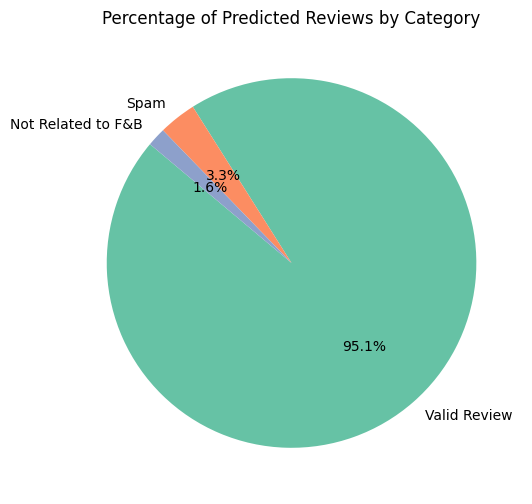

In [76]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("model_with_ids.csv")


plt.figure(figsize=(6,6))
df["Category"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("Set2")
)
plt.ylabel("")
plt.title("Percentage of Predicted Reviews by Category")
plt.show()


